In [1]:
!pip install polars 

In [2]:
import polars as pl
import glob

files = glob.glob(r"C:\Users\Rabeea\Downloads\taxi_data\*.parquet")
lazy_frames = [pl.scan_parquet(file) for file in files]
lazy_df = pl.concat(lazy_frames, how="vertical")


In [3]:
zone_df = pl.read_csv(r"C:\Users\Rabeea\Downloads\taxi_zone_lookup.csv")
borough_map = dict(zip(zone_df["LocationID"], zone_df["Borough"]))


In [4]:
import polars as pl
import glob

files = glob.glob(r"C:\Users\Rabeea\Downloads\taxi_data")
zone_df = pl.read_csv(r"C:\Users\Rabeea\Downloads\taxi_zone_lookup.csv")

borough_map = dict(zip(zone_df["LocationID"], zone_df["Borough"]))

trips_by_borough = (
    pl.scan_parquet(files)
    .with_columns([
        pl.col("PULocationID").replace(borough_map, default="Unknown").alias("pickup_borough"),
        pl.col("DOLocationID").replace(borough_map, default="Unknown").alias("dropoff_borough")
    ])
    .group_by("pickup_borough")
    .agg(trip_count = pl.len())
    .sort("trip_count", descending=True)
    .collect()                    

print("Done! trips_by_borough is ready:")
print(trips_by_borough)

C:\Users\Rabeea\AppData\Local\Temp\ipykernel_14124\124361033.py:16: DeprecationWarning: the `default` parameter for `replace` is deprecated. Use `replace_strict` instead to set a default while replacing values.
(Deprecated in version 1.0.0)
  pl.col("PULocationID").replace(borough_map, default="Unknown").alias("pickup_borough"),
C:\Users\Rabeea\AppData\Local\Temp\ipykernel_14124\124361033.py:17: DeprecationWarning: the `default` parameter for `replace` is deprecated. Use `replace_strict` instead to set a default while replacing values.
(Deprecated in version 1.0.0)
  pl.col("DOLocationID").replace(borough_map, default="Unknown").alias("dropoff_borough")


Done! trips_by_borough is ready:
shape: (8, 2)
┌────────────────┬────────────┐
│ pickup_borough ┆ trip_count │
│ ---            ┆ ---        │
│ str            ┆ u32        │
╞════════════════╪════════════╡
│ Manhattan      ┆ 36402062   │
│ Queens         ┆ 3887112    │
│ Brooklyn       ┆ 600018     │
│ Bronx          ┆ 126556     │
│ Unknown        ┆ 122200     │
│ N/A            ┆ 24001      │
│ EWR            ┆ 5940       │
│ Staten Island  ┆ 1831       │
└────────────────┴────────────┘


C:\Users\Rabeea\AppData\Local\Temp\ipykernel_14124\2800393433.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
C:\Users\Rabeea\AppData\Local\Temp\ipykernel_14124\2800393433.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'{int(x/1e6)}M' for x in current_values])


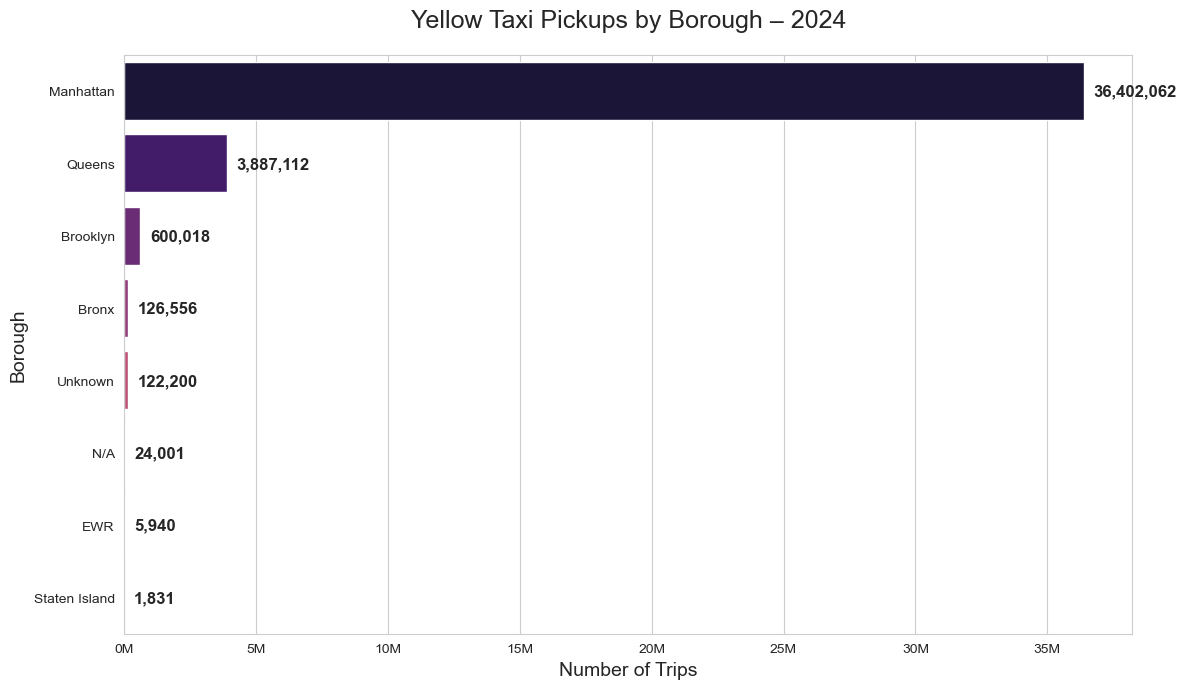

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

ax = sns.barplot(
    data=trips_by_borough.to_pandas(),    
    y="pickup_borough",
    x="trip_count",
    palette="magma"
)

ax.set_title("Yellow Taxi Pickups by Borough – 2024", fontsize=18, pad=20)
ax.set_xlabel("Number of Trips", fontsize=14)
ax.set_ylabel("Borough", fontsize=14)

for i, row in enumerate(trips_by_borough.iter_rows(named=True)):
    ax.text(row["trip_count"] + trips_by_borough["trip_count"].max()*0.01, 
            i, f'{row["trip_count"]:,}', va='center', fontsize=12, fontweight='bold')

current_values = ax.get_xticks()
ax.set_xticklabels([f'{int(x/1e6)}M' for x in current_values])

plt.tight_layout()
plt.show()

In [7]:
import polars as pl
import glob

files = glob.glob(r"C:\Users\Rabeea\Downloads\taxi_data")

zone_df = pl.read_csv(r"C:\Users\Rabeea\Downloads\taxi_zone_lookup.csv")
borough_map = dict(zip(zone_df["LocationID"], zone_df["Borough"]))

payment_type_map = {
    1: "Credit card",
    2: "Cash",
    3: "No charge",
    4: "Dispute",
    5: "Unknown",
    6: "Voided trip"
}

cash_vs_card = (
    pl.scan_parquet(files)
    .with_columns([
        pl.col("PULocationID").replace(borough_map, default="Unknown").alias("pickup_borough"),
        pl.col("payment_type").cast(pl.Int64).replace(payment_type_map, default="Unknown").alias("payment_method")
    ])
    .group_by(["pickup_borough", "payment_method"])
    .agg(trips = pl.len())
    .sort("trips", descending=True)
    .collect()
)

print(cash_vs_card)

C:\Users\Rabeea\AppData\Local\Temp\ipykernel_14124\3867035668.py:24: DeprecationWarning: the `default` parameter for `replace` is deprecated. Use `replace_strict` instead to set a default while replacing values.
(Deprecated in version 1.0.0)
  pl.col("PULocationID").replace(borough_map, default="Unknown").alias("pickup_borough"),
C:\Users\Rabeea\AppData\Local\Temp\ipykernel_14124\3867035668.py:25: DeprecationWarning: the `default` parameter for `replace` is deprecated. Use `replace_strict` instead to set a default while replacing values.
(Deprecated in version 1.0.0)
  pl.col("payment_type").cast(pl.Int64).replace(payment_type_map, default="Unknown").alias("payment_method")


shape: (40, 3)
┌────────────────┬────────────────┬──────────┐
│ pickup_borough ┆ payment_method ┆ trips    │
│ ---            ┆ ---            ┆ ---      │
│ str            ┆ str            ┆ u32      │
╞════════════════╪════════════════╪══════════╡
│ Manhattan      ┆ Credit card    ┆ 27154234 │
│ Manhattan      ┆ Cash           ┆ 4781249  │
│ Manhattan      ┆ Unknown        ┆ 3616110  │
│ Queens         ┆ Credit card    ┆ 2827823  │
│ Queens         ┆ Cash           ┆ 693567   │
│ …              ┆ …              ┆ …        │
│ EWR            ┆ Dispute        ┆ 190      │
│ EWR            ┆ No charge      ┆ 148      │
│ Staten Island  ┆ Dispute        ┆ 69       │
│ Staten Island  ┆ No charge      ┆ 58       │
│ EWR            ┆ Unknown        ┆ 21       │
└────────────────┴────────────────┴──────────┘


In [9]:
import polars as pl
import glob

files = glob.glob(r"C:\Users\Rabeea\Downloads\taxi_data")
zone_df = pl.read_csv(r"C:\Users\Rabeea\Downloads\taxi_zone_lookup.csv")

borough_map = dict(zip(zone_df["LocationID"], zone_df["Borough"]))
payment_type_map = {1: "Credit card", 2: "Cash", 3: "No charge", 4: "Dispute", 5: "Unknown", 6: "Voided trip"}

payment_by_borough = (
    pl.scan_parquet(files)
    .with_columns([
        pl.col("PULocationID").replace(borough_map, default="Unknown").alias("pickup_borough"),
        pl.col("payment_type").cast(pl.Int64).replace(payment_type_map, default="Unknown").alias("payment_method")
    ])
    .group_by("pickup_borough", "payment_method")
    .agg(trips = pl.len())
    .collect()
)

result = (
    payment_by_borough
    .with_columns(
        total_trips_in_borough = pl.col("trips").sum().over("pickup_borough")
    )
    .with_columns(
        percentage = pl.col("trips") / pl.col("total_trips_in_borough") * 100
    )
    .select([
        "pickup_borough",
        "payment_method",
        "trips",
        "percentage"
    ])
    .sort(["pickup_borough", "percentage"], descending=[False, True])
)

print(result)

C:\Users\Rabeea\AppData\Local\Temp\ipykernel_14124\2182760134.py:14: DeprecationWarning:

the `default` parameter for `replace` is deprecated. Use `replace_strict` instead to set a default while replacing values.
(Deprecated in version 1.0.0)

C:\Users\Rabeea\AppData\Local\Temp\ipykernel_14124\2182760134.py:15: DeprecationWarning:

the `default` parameter for `replace` is deprecated. Use `replace_strict` instead to set a default while replacing values.
(Deprecated in version 1.0.0)



shape: (40, 4)
┌────────────────┬────────────────┬───────┬────────────┐
│ pickup_borough ┆ payment_method ┆ trips ┆ percentage │
│ ---            ┆ ---            ┆ ---   ┆ ---        │
│ str            ┆ str            ┆ u32   ┆ f64        │
╞════════════════╪════════════════╪═══════╪════════════╡
│ Bronx          ┆ Credit card    ┆ 67754 ┆ 53.536774  │
│ Bronx          ┆ Unknown        ┆ 48663 ┆ 38.451753  │
│ Bronx          ┆ Cash           ┆ 7630  ┆ 6.028952   │
│ Bronx          ┆ Dispute        ┆ 1410  ┆ 1.114131   │
│ Bronx          ┆ No charge      ┆ 1099  ┆ 0.86839    │
│ …              ┆ …              ┆ …     ┆ …          │
│ Unknown        ┆ Credit card    ┆ 95816 ┆ 78.409165  │
│ Unknown        ┆ Cash           ┆ 20102 ┆ 16.450082  │
│ Unknown        ┆ Unknown        ┆ 2376  ┆ 1.944354   │
│ Unknown        ┆ No charge      ┆ 2265  ┆ 1.853519   │
│ Unknown        ┆ Dispute        ┆ 1641  ┆ 1.342881   │
└────────────────┴────────────────┴───────┴────────────┘


In [11]:
import polars as pl
import glob

files = glob.glob(r"C:\Users\Rabeea\Downloads\taxi_data")
zone_df = pl.read_csv(r"C:\Users\Rabeea\Downloads\taxi_zone_lookup.csv")

borough_map = dict(zip(zone_df["LocationID"], zone_df["Borough"]))
payment_type_map = {1: "Credit Card", 2: "Cash", 3: "No Charge", 4: "Dispute", 5: "Unknown", 6: "Voided trip"}

df = (
    pl.scan_parquet(files)
    .with_columns([
        pl.col("PULocationID").replace(borough_map, default="Unknown").alias("pickup_borough"),
        pl.col("payment_type").cast(pl.Int64).replace(payment_type_map, default="Unknown").alias("payment_method")
    ])
    .group_by(["pickup_borough", "payment_method"])
    .agg(trips=pl.len())
    .collect()
)

df_percent = (
    df.with_columns(
        total_per_borough = pl.sum("trips").over("pickup_borough")
    )
    .with_columns(
        percentage = pl.col("trips") / pl.col("total_per_borough") * 100
    )
    .filter(pl.col("payment_method").is_in(["Credit Card", "Cash", "No Charge"]))    
    .sort(["pickup_borough", "percentage"], descending=[False, True])
)

print(df_percent)

C:\Users\Rabeea\AppData\Local\Temp\ipykernel_14124\316988041.py:14: DeprecationWarning:

the `default` parameter for `replace` is deprecated. Use `replace_strict` instead to set a default while replacing values.
(Deprecated in version 1.0.0)

C:\Users\Rabeea\AppData\Local\Temp\ipykernel_14124\316988041.py:15: DeprecationWarning:

the `default` parameter for `replace` is deprecated. Use `replace_strict` instead to set a default while replacing values.
(Deprecated in version 1.0.0)



shape: (24, 5)
┌────────────────┬────────────────┬────────┬───────────────────┬────────────┐
│ pickup_borough ┆ payment_method ┆ trips  ┆ total_per_borough ┆ percentage │
│ ---            ┆ ---            ┆ ---    ┆ ---               ┆ ---        │
│ str            ┆ str            ┆ u32    ┆ u32               ┆ f64        │
╞════════════════╪════════════════╪════════╪═══════════════════╪════════════╡
│ Bronx          ┆ Credit Card    ┆ 67754  ┆ 126556            ┆ 53.536774  │
│ Bronx          ┆ Cash           ┆ 7630   ┆ 126556            ┆ 6.028952   │
│ Bronx          ┆ No Charge      ┆ 1099   ┆ 126556            ┆ 0.86839    │
│ Brooklyn       ┆ Credit Card    ┆ 285024 ┆ 600018            ┆ 47.502575  │
│ Brooklyn       ┆ Cash           ┆ 33153  ┆ 600018            ┆ 5.525334   │
│ …              ┆ …              ┆ …      ┆ …                 ┆ …          │
│ Staten Island  ┆ Credit Card    ┆ 308    ┆ 1831              ┆ 16.821409  │
│ Staten Island  ┆ No Charge      ┆ 58     ┆ 1831

In [13]:
import polars as pl

lazy_df = (
    pl.scan_parquet("C:/Users/Rabeea/Downloads/taxi_data")
      .with_columns([
          pl.col("tpep_pickup_datetime").cast(pl.Datetime("ns")),
          pl.col("tpep_dropoff_datetime").cast(pl.Datetime("ns"))
      ])
)


In [14]:
lazy_df.collect_schema()


Schema([('VendorID', Int32),
        ('tpep_pickup_datetime', Datetime(time_unit='ns', time_zone=None)),
        ('tpep_dropoff_datetime', Datetime(time_unit='ns', time_zone=None)),
        ('passenger_count', Int64),
        ('trip_distance', Float64),
        ('RatecodeID', Int64),
        ('store_and_fwd_flag', String),
        ('PULocationID', Int32),
        ('DOLocationID', Int32),
        ('payment_type', Int64),
        ('fare_amount', Float64),
        ('extra', Float64),
        ('mta_tax', Float64),
        ('tip_amount', Float64),
        ('tolls_amount', Float64),
        ('improvement_surcharge', Float64),
        ('total_amount', Float64),
        ('congestion_surcharge', Float64),
        ('Airport_fee', Float64)])

C:\Users\Rabeea\AppData\Local\Temp\ipykernel_14124\602707459.py:19: DeprecationWarning:

the `default` parameter for `replace` is deprecated. Use `replace_strict` instead to set a default while replacing values.
(Deprecated in version 1.0.0)

C:\Users\Rabeea\AppData\Local\Temp\ipykernel_14124\602707459.py:27: DeprecationWarning:

`pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)

C:\Users\Rabeea\AppData\Local\Temp\ipykernel_14124\602707459.py:63: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



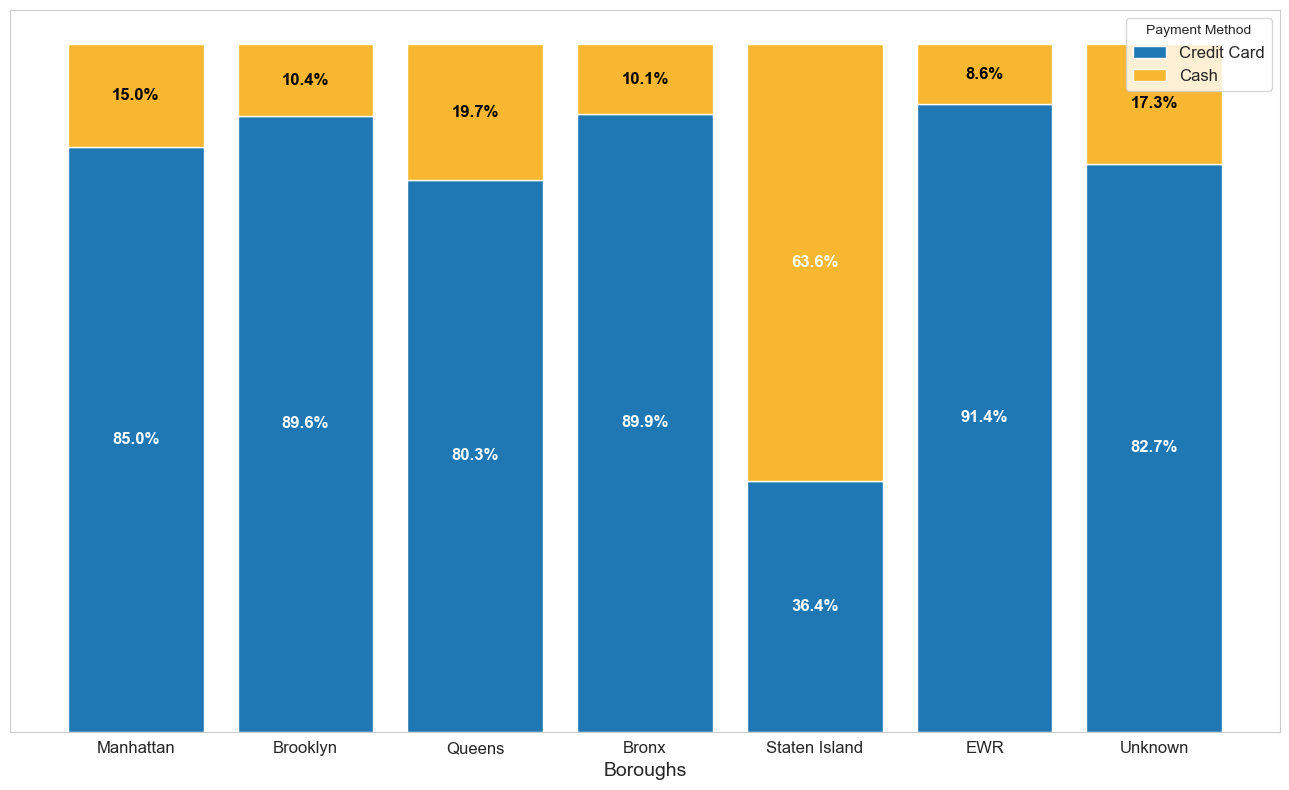

Stacked chart saved → payment_by_borough_stacked.png


In [159]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


borough_map = dict(zip(zone_df["LocationID"], zone_df["Borough"]))

payment_by_borough = (
    lazy_df
    .with_columns([
        pl.col("PULocationID")
        .replace(borough_map, default="Unknown")
        .alias("borough"),

          KEEP PAYMENT AS INT HERE (NO STRING YET!)
        pl.col("payment_type").cast(pl.Int64).alias("pay_int")
    ])
    .filter(pl.col("pay_int").is_in([1, 2]))   
    .group_by(["borough", "pay_int"])
    .agg(pl.count().alias("trips"))
    .collect()
)

pdf = payment_by_borough.to_pandas()

pdf["payment_method"] = pdf["pay_int"].map({
    1: "Credit Card",
    2: "Cash"
})

pdf = pdf.drop(columns=["pay_int"])

pdf["total"] = pdf.groupby("borough")["trips"].transform("sum")
pdf["pct"] = pdf["trips"] / pdf["total"] * 100

borough_order = [
    "Manhattan", "Brooklyn", "Queens", "Bronx", 
    "Staten Island", "EWR", "Unknown"
]

pdf["borough"] = pd.Categorical(pdf["borough"], categories=borough_order, ordered=True)
pdf = pdf.sort_values("borough")

pivot = pdf.pivot_table(index="borough", columns="payment_method", values="pct", fill_value=0)


plt.figure(figsize=(13, 8))

bottom = np.zeros(len(pivot))
colors = {"Credit Card": " 1f77b4", "Cash": " f7b731"}

for method in ["Credit Card", "Cash"]:
    plt.bar(
        pivot.index,
        pivot[method],
        bottom=bottom,
        label=method,
        color=colors[method]
    )
    bottom += pivot[method]

  Label percentages inside bars
for i, borough in enumerate(pivot.index):
    cumulative = 0
    for method in ["Credit Card", "Cash"]:
        height = pivot.loc[borough, method]
        if height > 0:
            plt.text(
                i,
                cumulative + height / 2,
                f"{height:.1f}%",
                ha="center",
                va="center",
                fontsize=12,
                fontweight="bold",
                color="white" if height > 35 else "black"
            )
        cumulative += height

 plt.title("Cash vs Credit Card Payments by Borough\nNYC Yellow Taxis — 2024", fontsize=20, weight="bold")

plt.gca().axes.get_yaxis().set_visible(False)
plt.ylabel("")
plt.xlabel("Boroughs", fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.ylim(0, 105)
plt.legend(title="Payment Method", fontsize=12)
plt.grid(False)
plt.tight_layout()

plt.savefig("payment_by_borough_stacked.png", dpi=320, bbox_inches="tight")
plt.show()

print("Stacked chart saved → payment_by_borough_stacked.png")


In [21]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt

borough_map = dict(zip(zone_df["LocationID"], zone_df["Borough"]))

rev_df = (
    lazy_df
    .with_columns([
        pl.col("PULocationID").replace(borough_map, default="Unknown").alias("borough"),
        (pl.col("fare_amount") + pl.col("tip_amount")).alias("revenue")
    ])
    .group_by("borough")
    .agg([
        pl.sum("revenue").alias("total_revenue"),
        pl.len().alias("total_trips")
    ])
    .collect()
)

pdf = rev_df.to_pandas()

pdf["revenue_per_trip"] = pdf["total_revenue"] / pdf["total_trips"]

order = ["Manhattan", "Brooklyn", "Queens", "Bronx", "Staten Island", "EWR", "Unknown"]
pdf["borough"] = pd.Categorical(pdf["borough"], categories=order, ordered=True)
pdf = pdf.sort_values("borough")


C:\Users\Rabeea\AppData\Local\Temp\ipykernel_14124\3249676910.py:12: DeprecationWarning:

the `default` parameter for `replace` is deprecated. Use `replace_strict` instead to set a default while replacing values.
(Deprecated in version 1.0.0)



In [23]:
print(lazy_df.schema)


Schema({'VendorID': Int32, 'tpep_pickup_datetime': Datetime(time_unit='ns', time_zone=None), 'tpep_dropoff_datetime': Datetime(time_unit='ns', time_zone=None), 'passenger_count': Int64, 'trip_distance': Float64, 'RatecodeID': Int64, 'store_and_fwd_flag': String, 'PULocationID': Int32, 'DOLocationID': Int32, 'payment_type': Int64, 'fare_amount': Float64, 'extra': Float64, 'mta_tax': Float64, 'tip_amount': Float64, 'tolls_amount': Float64, 'improvement_surcharge': Float64, 'total_amount': Float64, 'congestion_surcharge': Float64, 'Airport_fee': Float64})


C:\Users\Rabeea\AppData\Local\Temp\ipykernel_14124\3441606575.py:1: PerformanceWarning:

Resolving the schema of a LazyFrame is a potentially expensive operation. Use `LazyFrame.collect_schema()` to get the schema without this warning.



In [24]:
lazy_df.collect_schema()

Schema([('VendorID', Int32),
        ('tpep_pickup_datetime', Datetime(time_unit='ns', time_zone=None)),
        ('tpep_dropoff_datetime', Datetime(time_unit='ns', time_zone=None)),
        ('passenger_count', Int64),
        ('trip_distance', Float64),
        ('RatecodeID', Int64),
        ('store_and_fwd_flag', String),
        ('PULocationID', Int32),
        ('DOLocationID', Int32),
        ('payment_type', Int64),
        ('fare_amount', Float64),
        ('extra', Float64),
        ('mta_tax', Float64),
        ('tip_amount', Float64),
        ('tolls_amount', Float64),
        ('improvement_surcharge', Float64),
        ('total_amount', Float64),
        ('congestion_surcharge', Float64),
        ('Airport_fee', Float64)])

In [25]:
(pl.col("fare_amount") +
 pl.col("tip_amount") +
 pl.col("tolls_amount") +
 pl.col("extra") +
 pl.col("mta_tax") +
 pl.col("improvement_surcharge")).alias("revenue")


<Expr ['[([([([([(col("fare_amount")) …'] at 0x1F23AEA30B0>

In [26]:
rev_df = (
    lazy_df
    .with_columns([
        (pl.col("fare_amount") + pl.col("tip_amount")).alias("revenue")
    ])
    .group_by("PULocationID")
    .agg([
        pl.sum("revenue").alias("total_revenue"),
        pl.len().alias("total_trips")
    ])
    .collect()
)


In [27]:
borough_map = dict(zip(zone_df["LocationID"], zone_df["Borough"]))

rev_df = (
    lazy_df
    .with_columns([
        pl.col("PULocationID").replace(borough_map, default="Unknown").alias("borough"),
        (pl.col("fare_amount") + pl.col("tip_amount")).alias("revenue")
    ])
    .group_by("borough")
    .agg([
        pl.sum("revenue").alias("total_revenue"),
        pl.len().alias("total_trips")
    ])
    .collect()
)


C:\Users\Rabeea\AppData\Local\Temp\ipykernel_14124\3607228199.py:6: DeprecationWarning:

the `default` parameter for `replace` is deprecated. Use `replace_strict` instead to set a default while replacing values.
(Deprecated in version 1.0.0)



In [28]:
  Map boroughs
borough_map = dict(zip(zone_df["LocationID"], zone_df["Borough"]))

  Revenue = fare + tip (simple + correct)
rev_df = (
    lazy_df
    .with_columns([
        pl.col("PULocationID")
            .replace(borough_map, default="Unknown")
            .alias("borough"),

        (pl.col("fare_amount") + pl.col("tip_amount"))
            .alias("revenue")
    ])
    .group_by("borough")
    .agg([
        pl.sum("revenue").alias("total_revenue"),
        pl.len().alias("total_trips")
    ])
    .collect()
)


C:\Users\Rabeea\AppData\Local\Temp\ipykernel_14124\2409002373.py:9: DeprecationWarning:

the `default` parameter for `replace` is deprecated. Use `replace_strict` instead to set a default while replacing values.
(Deprecated in version 1.0.0)



In [29]:
pdf = rev_df.to_pandas()

  Calculate revenue per trip
pdf["revenue_per_trip"] = pdf["total_revenue"] / pdf["total_trips"]

  Clean borough order
borough_order = ["Manhattan", "Brooklyn", "Queens", "Bronx", "Staten Island", "EWR", "Unknown"]
pdf["borough"] = pd.Categorical(pdf["borough"], categories=borough_order, ordered=True)
pdf = pdf.sort_values("borough")


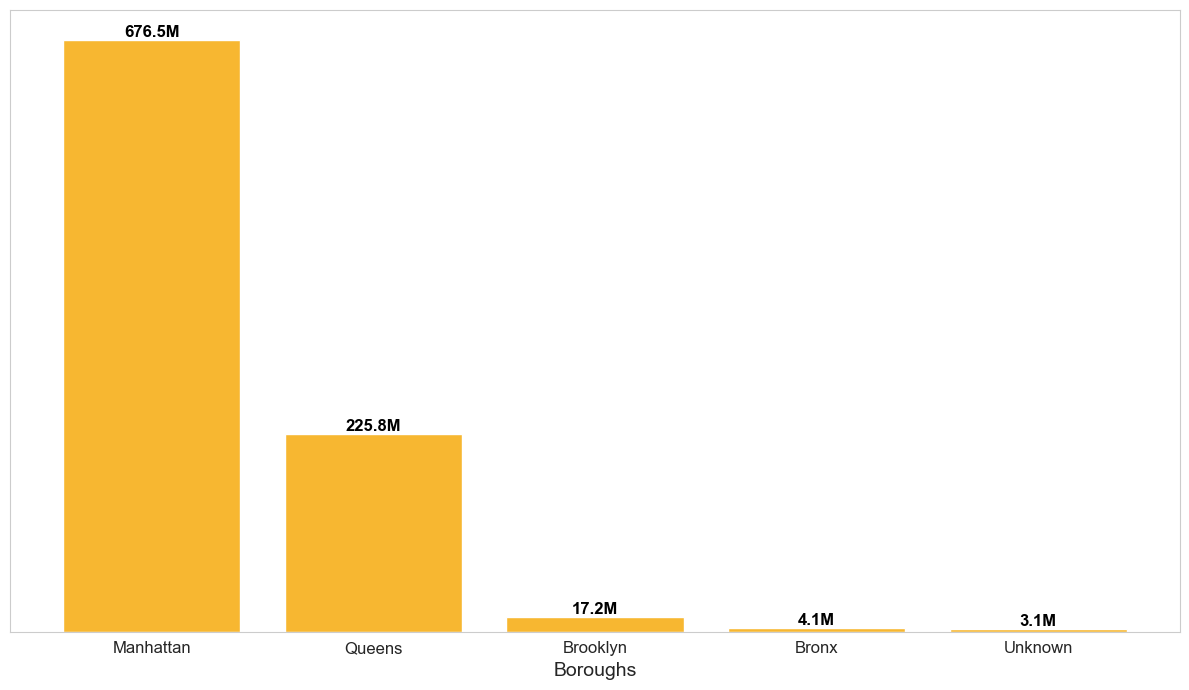

In [131]:
import matplotlib.pyplot as plt
pdf = rev_df.to_pandas()
pdf["borough"] = pdf["borough"].astype(str)

pdf["revenue_millions"] = pdf["total_revenue"] / 1e6

top5 = pdf.sort_values("revenue_millions", ascending=False).head(5)

plt.figure(figsize=(12,7))

plt.bar(top5["borough"], top5["revenue_millions"], color=" f7b731")

plt.grid(False)

plt.gca().axes.get_yaxis().set_visible(False)
plt.ylabel("")

plt.xlabel("Boroughs", fontsize=14)

plt.xticks(rotation=0, fontsize=12)

for i, val in enumerate(top5["revenue_millions"]):
    plt.text(
        i,
        val + 0.1,
        f"{val:.1f}M",
        ha="center",
        va="bottom",
        fontsize=12,
        fontweight="bold",
        color="black"
    )

plt.tight_layout()

plt.savefig("revenue_by_borough.png", dpi=320, bbox_inches="tight")

plt.show()


In [32]:
borough_map = dict(zip(zone_df["LocationID"], zone_df["Borough"]))

tip_df = (
    lazy_df
    .with_columns([
        pl.col("PULocationID")
            .replace(borough_map, default="Unknown")
            .alias("borough"),

        (pl.col("tip_amount") / pl.col("fare_amount"))
            .alias("tip_rate")
    ])
    .filter(pl.col("tip_rate").is_finite() & (pl.col("tip_rate") >= 0) & (pl.col("tip_rate") < 1))
    .group_by("borough")
    .agg(pl.mean("tip_rate").alias("avg_tip_rate"))
    .collect()
)


C:\Users\Rabeea\AppData\Local\Temp\ipykernel_14124\2298831459.py:7: DeprecationWarning:

the `default` parameter for `replace` is deprecated. Use `replace_strict` instead to set a default while replacing values.
(Deprecated in version 1.0.0)



In [139]:
import pandas as pd

pdf_tip = tip_df.to_pandas()

order = ["Manhattan", "Brooklyn", "Queens", "Bronx", "Staten Island", "EWR", "Unknown"]
pdf_tip["borough"] = pd.Categorical(pdf_tip["borough"], categories=order, ordered=True)
pdf_tip = pdf_tip.sort_values("borough")

pdf_tip["avg_tip_pct"] = pdf_tip["avg_tip_rate"] * 100

pdf_tip["borough"] = pdf_tip["borough"].astype(str)



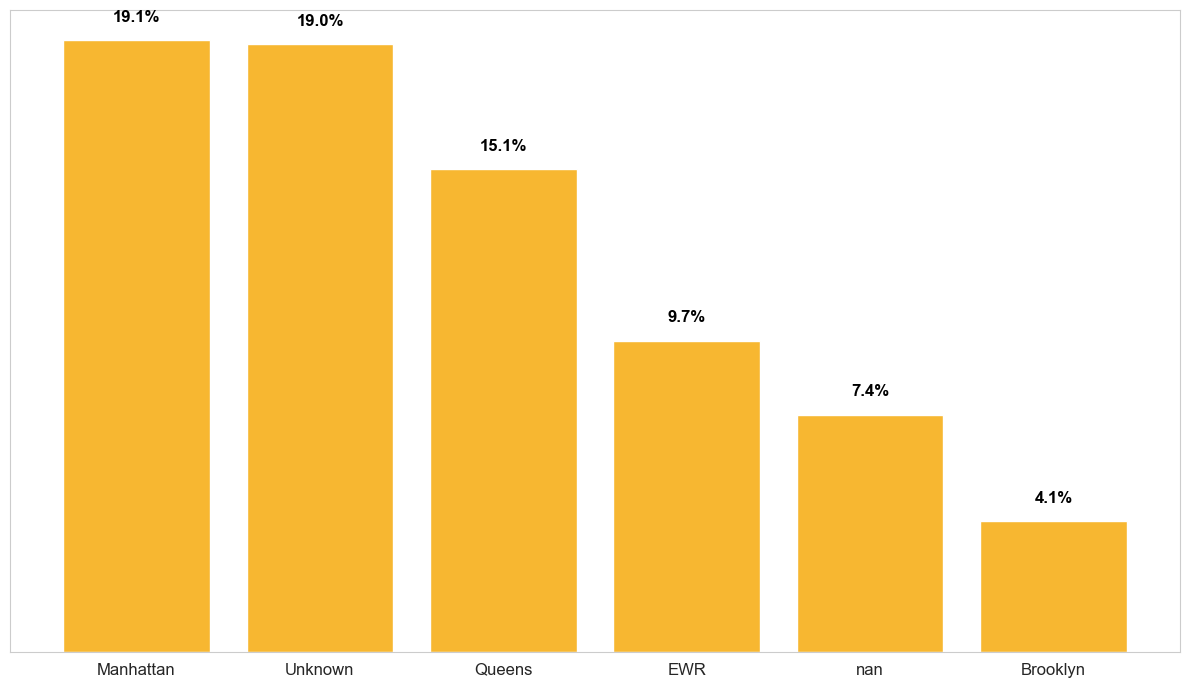

In [142]:
import matplotlib.pyplot as plt

top6 = pdf_tip.sort_values("avg_tip_pct", ascending=False).head(6)

plt.figure(figsize=(12,7))

plt.bar(top6["borough"], top6["avg_tip_pct"], color=" f7b731")

plt.gca().axes.get_yaxis().set_visible(False)
plt.ylabel("")

plt.grid(False)

plt.xticks(rotation=0, fontsize=12)

  
for i, val in enumerate(top6["avg_tip_pct"]):
    plt.text(
        i,
        val + 0.5,
        f"{val:.1f}%",
        ha="center",
        va="bottom",
        fontsize=12,
        fontweight="bold",
        color="black"
    )

plt.tight_layout()
plt.savefig("avg_tip_pct_top6.png", dpi=320, bbox_inches="tight")
plt.show()


In [39]:
import polars as pl

df = pl.read_parquet("C:/Users/Rabeea/Downloads/taxi_data/Jan 2024.parquet")
print(df.schema)


Schema({'VendorID': Int32, 'tpep_pickup_datetime': Datetime(time_unit='ns', time_zone=None), 'tpep_dropoff_datetime': Datetime(time_unit='ns', time_zone=None), 'passenger_count': Int64, 'trip_distance': Float64, 'RatecodeID': Int64, 'store_and_fwd_flag': String, 'PULocationID': Int32, 'DOLocationID': Int32, 'payment_type': Int64, 'fare_amount': Float64, 'extra': Float64, 'mta_tax': Float64, 'tip_amount': Float64, 'tolls_amount': Float64, 'improvement_surcharge': Float64, 'total_amount': Float64, 'congestion_surcharge': Float64, 'Airport_fee': Float64})


In [40]:
pl.read_parquet("C:/Users/Rabeea/Downloads/taxi_data/Jun 2024.parquet").schema


Schema([('VendorID', Int32),
        ('tpep_pickup_datetime', Datetime(time_unit='ns', time_zone=None)),
        ('tpep_dropoff_datetime', Datetime(time_unit='ns', time_zone=None)),
        ('passenger_count', Int64),
        ('trip_distance', Float64),
        ('RatecodeID', Int64),
        ('store_and_fwd_flag', String),
        ('PULocationID', Int32),
        ('DOLocationID', Int32),
        ('payment_type', Int64),
        ('fare_amount', Float64),
        ('extra', Float64),
        ('mta_tax', Float64),
        ('tip_amount', Float64),
        ('tolls_amount', Float64),
        ('improvement_surcharge', Float64),
        ('total_amount', Float64),
        ('congestion_surcharge', Float64),
        ('Airport_fee', Float64)])

In [145]:
import glob
import polars as pl

files = glob.glob("C:/Users/Rabeea/Downloads/taxi_data/*.parquet")

lazy_frames = []
for f in files:
    lf = pl.scan_parquet(f).with_columns([
        pl.col("tpep_pickup_datetime").cast(pl.Datetime("ns")),
        pl.col("tpep_dropoff_datetime").cast(pl.Datetime("ns"))
    ])
    lazy_frames.append(lf)

lazy_df = pl.concat(lazy_frames, how="vertical")


In [146]:
tip_hour_df = (
    lazy_df
    .with_columns([
        pl.col("tpep_pickup_datetime").dt.hour().alias("pickup_hour"),
        (pl.col("tip_amount") / pl.col("fare_amount")).alias("tip_rate")
    ])
    .filter(
        (pl.col("tip_rate").is_finite()) &
        (pl.col("tip_rate") >= 0) &
        (pl.col("tip_rate") < 1)
    )
    .group_by("pickup_hour")
    .agg(pl.mean("tip_rate").alias("avg_tip_rate"))
    .sort("pickup_hour")
    .collect()
)


In [147]:
tip_hour_df = (
    lazy_df
    .with_columns([
        pl.col("tpep_pickup_datetime").dt.hour().alias("pickup_hour"),
        (pl.col("tip_amount") / pl.col("fare_amount")).alias("tip_rate")
    ])
    .filter(
        (pl.col("tip_rate").is_finite()) &
        (pl.col("tip_rate") >= 0) &
        (pl.col("tip_rate") < 1)
    )
    .group_by("pickup_hour")
    .agg(pl.mean("tip_rate").alias("avg_tip_rate"))
    .sort("pickup_hour")
    .collect()
)


In [148]:
pdf = tip_hour_df.to_pandas()
pdf["avg_tip_pct"] = pdf["avg_tip_rate"] * 100


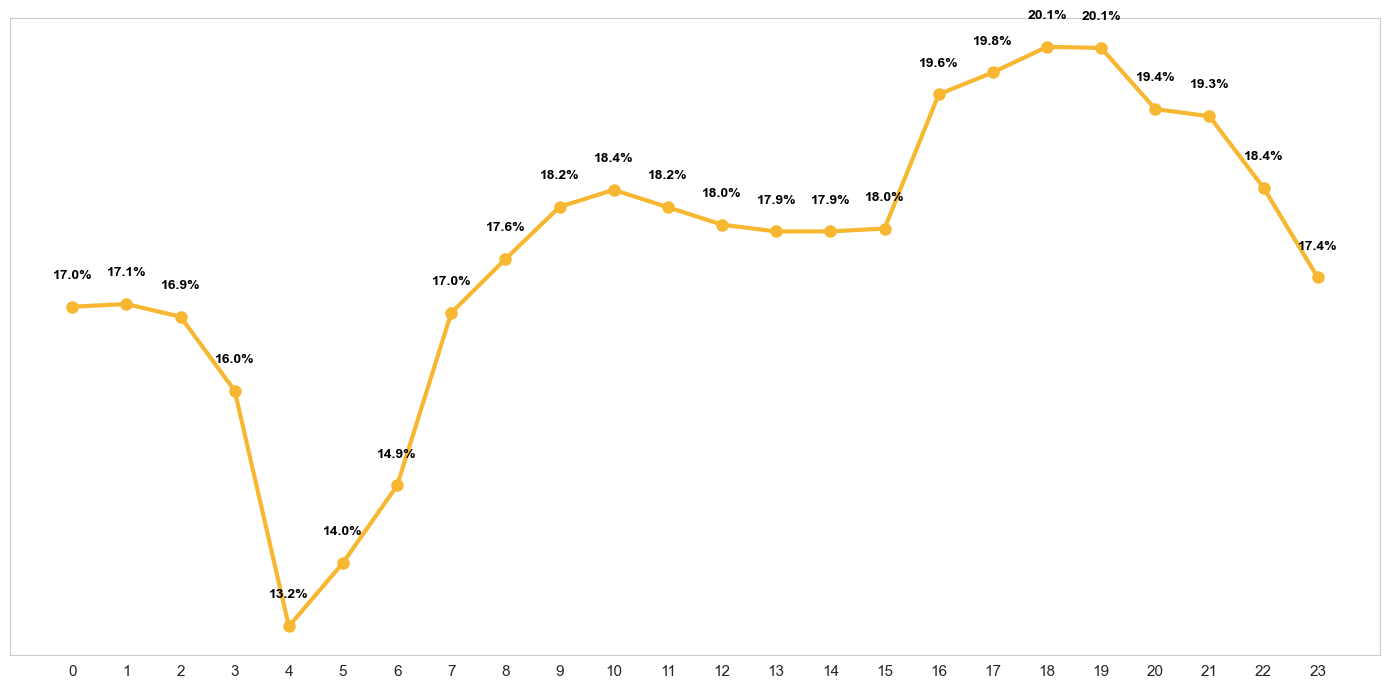

In [152]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

  Line chart with bold dot markers
plt.plot(
    pdf["pickup_hour"],
    pdf["avg_tip_pct"],
    color=" f7b731",
    linewidth=3,
    marker="o",            
    markersize=8,
    markeredgecolor=" f7b731"
)

plt.title(...)

plt.xlabel("")
plt.ylabel("")
plt.gca().axes.get_yaxis().set_visible(False)


plt.xticks(range(0, 24), fontsize=11)

plt.grid(False)

for i, val in enumerate(pdf["avg_tip_pct"]):
    plt.text(
        pdf["pickup_hour"].iloc[i],
        val + 0.3,
        f"{val:.1f}%",
        ha="center",
        va="bottom",
        fontsize=10,
        fontweight="bold",
        color="black"
    )

plt.tight_layout()
plt.savefig("avg_tip_by_hour.png", dpi=320, bbox_inches="tight")
plt.show()


In [53]:
lazy_df.schema


C:\Users\Rabeea\AppData\Local\Temp\ipykernel_14124\3316996470.py:1: PerformanceWarning:

Resolving the schema of a LazyFrame is a potentially expensive operation. Use `LazyFrame.collect_schema()` to get the schema without this warning.



Schema([('VendorID', Int32),
        ('tpep_pickup_datetime', Datetime(time_unit='ns', time_zone=None)),
        ('tpep_dropoff_datetime', Datetime(time_unit='ns', time_zone=None)),
        ('passenger_count', Int64),
        ('trip_distance', Float64),
        ('RatecodeID', Int64),
        ('store_and_fwd_flag', String),
        ('PULocationID', Int32),
        ('DOLocationID', Int32),
        ('payment_type', Int64),
        ('fare_amount', Float64),
        ('extra', Float64),
        ('mta_tax', Float64),
        ('tip_amount', Float64),
        ('tolls_amount', Float64),
        ('improvement_surcharge', Float64),
        ('total_amount', Float64),
        ('congestion_surcharge', Float64),
        ('Airport_fee', Float64)])

In [156]:
top_per_zone = (
    lazy_df
    .group_by(["PULocationID", "VendorID"])
    .agg(pl.count().alias("trips"))
    .sort(["PULocationID", "trips"], descending=[False, True])
    .collect()
)

top_per_zone.write_csv("vendor_per_zone.csv")


C:\Users\Rabeea\AppData\Local\Temp\ipykernel_14124\2627316016.py:4: DeprecationWarning:

`pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)



In [157]:
pickup_zone_counts = (
    lazy_df
    .group_by("PULocationID")
    .agg(pl.count().alias("pickup_count"))
    .collect()
)

pickup_zone_counts.write_csv("pickup_counts.csv")


C:\Users\Rabeea\AppData\Local\Temp\ipykernel_14124\1746390538.py:4: DeprecationWarning:

`pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)



In [158]:
dropoff_zone_counts = (
    lazy_df
    .group_by("DOLocationID")
    .agg(pl.count().alias("dropoff_count"))
    .collect()
)

dropoff_zone_counts.write_csv("dropoff_counts.csv")


C:\Users\Rabeea\AppData\Local\Temp\ipykernel_14124\2037830107.py:4: DeprecationWarning:

`pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)

